In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
chicago = pd.read_csv("chicago_2016.csv", parse_dates=["start_time","end_time"])

In [5]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [6]:
chicago['driving_time'] = chicago['end_time']-chicago['start_time'] 

In [7]:
def get_weekday (ts):
    return ts.weekday()
def get_hour (ts):
    return ts.hour

chicago["Weekday"]=chicago["start_time"].apply(lambda x: get_weekday (x))
chicago["Hour"]=chicago["start_time"].apply(lambda x: get_hour (x))
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Weekday,Hour
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,3,23
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,3,23
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,3,23
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00,3,23
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00,3,23


In [9]:
montag = chicago[chicago["Weekday"]==0].size
dienstag = chicago[chicago["Weekday"]==1].size
mittwoch = chicago[chicago["Weekday"]==2].size
donnerstag = chicago[chicago["Weekday"]==3].size
freitag = chicago[chicago["Weekday"]==4].size
samstag = chicago[chicago["Weekday"]==5].size
sonntag = chicago[chicago["Weekday"]==6].size

print(montag)
print(dienstag)
print(mittwoch)
print(donnerstag)
print(freitag)
print(samstag)
print(sonntag)

weekdaysize = pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [montag, dienstag, mittwoch, donnerstag, freitag, samstag, sonntag]})

6073991
5958810
5277360
5525278
5822113
5523936
5367725


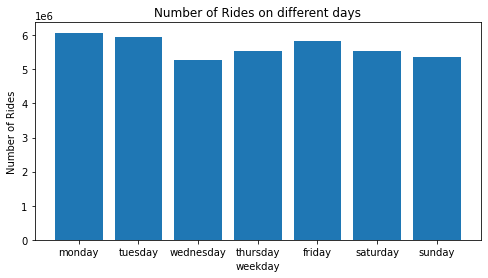

In [10]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekdaysize["Weekday"], weekdaysize["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()

In [11]:
weekmorning= pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [chicago[(chicago['Weekday']==0) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==1) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==2) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==3) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==4) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==5) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size ,chicago[(chicago['Weekday']==6) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size ] })

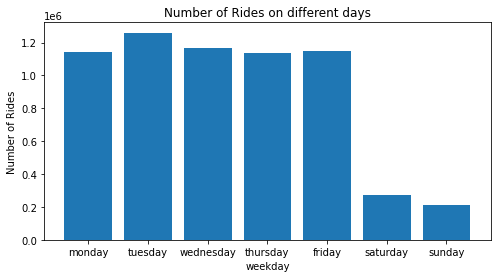

In [12]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekmorning["Weekday"], weekmorning["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()

In [13]:
## Jahresschwankungen


In [14]:
def get_month (ts):
    return ts.month
chicago["Month"]=chicago["start_time"].apply(lambda x: get_month (x))
chicago.head(2)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Weekday,Hour,Month
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,3,23,3
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,3,23,3


In [15]:
jan = chicago[chicago["Month"]==1].size
feb = chicago[chicago["Month"]==2].size
mer = chicago[chicago["Month"]==3].size
apr = chicago[chicago["Month"]==4].size
mai = chicago[chicago["Month"]==5].size
juni = chicago[chicago["Month"]==6].size
juli = chicago[chicago["Month"]==7].size
aug = chicago[chicago["Month"]==8].size
sep = chicago[chicago["Month"]==9].size
okt = chicago[chicago["Month"]==10].size
nov = chicago[chicago["Month"]==11].size
dez = chicago[chicago["Month"]==12].size


In [16]:
year= pd.DataFrame({'Months': [ 'january' , 'feburary' , 'march' , 'april' , 'may' ,  'june' , 'july' , 'august' , 'september' , 'october' , 'november', 'december'], 'Rides': [  chicago[chicago['Month']==1].size , chicago[chicago['Month']==2].size , chicago[chicago['Month']==3].size , chicago[chicago['Month']==4].size , chicago[chicago['Month']==5].size , chicago[chicago['Month']==6].size , chicago[chicago['Month']==7].size , chicago[chicago['Month']==8].size , chicago[chicago['Month']==9].size , chicago[chicago['Month']==10].size , chicago[chicago['Month']==11].size , chicago[chicago['Month']==12].size ,]})

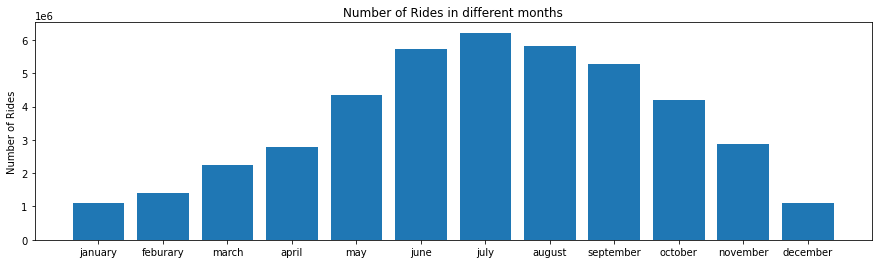

In [17]:
fig,ax = plt.subplots(figsize=(15,4))

ax.bar(year["Months"], year["Rides"])
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides in different months")

plt.show()

In [18]:
morning_start = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10)]
mid_morning_start = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)]
noon_start = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)]
afternoon_start = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)]
evening_start = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)]
night_start = chicago[((chicago['Hour']>=21) & (chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]

In [20]:
# Fahrten am Morgen innerhalb einer Woche
morning_monday = morning_start[morning_start['Weekday']==0]
morning_tuesday = morning_start[morning_start['Weekday']==1]
morning_wednesday = morning_start[morning_start['Weekday']==2]
morning_thursday = morning_start[morning_start['Weekday']==3]
morning_friday = morning_start[morning_start['Weekday']==4]
morning_saturday = morning_start[morning_start['Weekday']==5]
morning_sunday =  morning_start[morning_start['Weekday']==6]
morning_rides = np.array([morning_monday['Hour'].size, morning_tuesday['Hour'].size, morning_wednesday['Hour'].size,  morning_thursday['Hour'].size,  morning_friday['Hour'].size,  morning_saturday['Hour'].size,  morning_sunday['Hour'].size])

In [21]:
# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday = mid_morning_start[mid_morning_start['Weekday']==0]
midmorning_tuesday = mid_morning_start[mid_morning_start['Weekday']==1]
midmorning_wednesday = mid_morning_start[mid_morning_start['Weekday']==2]
midmorning_thursday = mid_morning_start[mid_morning_start['Weekday']==3]
midmorning_friday = mid_morning_start[mid_morning_start['Weekday']==4]
midmorning_saturday = mid_morning_start[mid_morning_start['Weekday']==5]
midmorning_sunday =  mid_morning_start[mid_morning_start['Weekday']==6]
midmorning_rides = np.array([midmorning_monday['Hour'].size, midmorning_tuesday['Hour'].size, midmorning_wednesday['Hour'].size,  midmorning_thursday['Hour'].size,  midmorning_friday['Hour'].size,  midmorning_saturday['Hour'].size,  midmorning_sunday['Hour'].size])

# Fahrten am Mittag innerhalb einer Woche
noon_monday = noon_start[noon_start['Weekday']==0]
noon_tuesday = noon_start[noon_start['Weekday']==1]
noon_wednesday = noon_start[noon_start['Weekday']==2]
noon_thursday = noon_start[noon_start['Weekday']==3]
noon_friday = noon_start[noon_start['Weekday']==4]
noon_saturday = noon_start[noon_start['Weekday']==5]
noon_sunday =  noon_start[noon_start['Weekday']==6]
noon_rides = np.array([noon_monday['Hour'].size, noon_tuesday['Hour'].size, noon_wednesday['Hour'].size,  noon_thursday['Hour'].size,  noon_friday['Hour'].size, noon_saturday['Hour'].size, noon_sunday['Hour'].size])

# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday = afternoon_start[afternoon_start['Weekday']==0]
afternoon_tuesday = afternoon_start[afternoon_start['Weekday']==1]
afternoon_wednesday = afternoon_start[afternoon_start['Weekday']==2]
afternoon_thursday = afternoon_start[afternoon_start['Weekday']==3]
afternoon_friday = afternoon_start[afternoon_start['Weekday']==4]
afternoon_saturday = afternoon_start[afternoon_start['Weekday']==5]
afternoon_sunday =  afternoon_start[afternoon_start['Weekday']==6]
afternoon_rides = np.array([afternoon_monday['Hour'].size, afternoon_tuesday['Hour'].size, afternoon_wednesday['Hour'].size,  afternoon_thursday['Hour'].size,  afternoon_friday['Hour'].size, afternoon_saturday['Hour'].size, afternoon_sunday['Hour'].size])

# Fahrten am Abend innerhalb einer Woche
evening_monday = evening_start[evening_start['Weekday']==0]
evening_tuesday = evening_start[evening_start['Weekday']==1]
evening_wednesday = evening_start[evening_start['Weekday']==2]
evening_thursday = evening_start[evening_start['Weekday']==3]
evening_friday = evening_start[evening_start['Weekday']==4]
evening_saturday = evening_start[evening_start['Weekday']==5]
evening_sunday =  evening_start[evening_start['Weekday']==6]
evening_rides = np.array([evening_monday['Hour'].size, evening_tuesday['Hour'].size, evening_wednesday['Hour'].size,  evening_thursday['Hour'].size,  evening_friday['Hour'].size, evening_saturday['Hour'].size, evening_sunday['Hour'].size])

# nächtliche Fahrten innerhalb einer Woche
night_monday = night_start[night_start['Weekday']==0]
night_tuesday = night_start[night_start['Weekday']==1]
night_wednesday = night_start[night_start['Weekday']==2]
night_thursday = night_start[night_start['Weekday']==3]
night_friday = night_start[night_start['Weekday']==4]
night_saturday = night_start[night_start['Weekday']==5]
night_sunday =  night_start[night_start['Weekday']==6]
night_rides = np.array([night_monday['Hour'].size, night_tuesday['Hour'].size, night_wednesday['Hour'].size,  night_thursday['Hour'].size,  night_friday['Hour'].size, night_saturday['Hour'].size, night_sunday['Hour'].size])

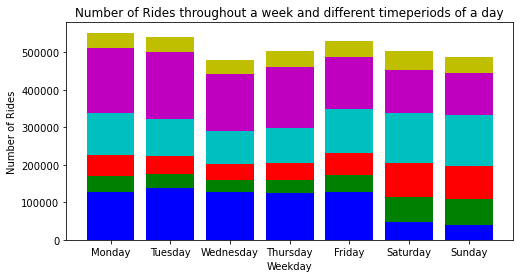

In [28]:
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekly_rides_morning =pd.Series([morning_start[morning_start['Weekday']==0].size, morning_start[morning_start['Weekday']==1].size])
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides, midmorning_rides, noon_rides, afternoon_rides, evening_rides, night_rides])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day")

plt.show()

In [44]:
#Subscriber
morning_start_sub = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10) & (chicago['user_type']=='Subscriber')]
mid_morning_start_sub = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)& (chicago['user_type']=='Subscriber')]
noon_start_sub = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)& (chicago['user_type']=='Subscriber')]
afternoon_start_sub = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)& (chicago['user_type']=='Subscriber')]
evening_start_sub = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)& (chicago['user_type']=='Subscriber')]
night_start_sub = chicago[((chicago['Hour']>=21) &  (chicago['user_type']=='Subscriber') &(chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]
#Customer
morning_start_cust = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10) & (chicago['user_type']=='Customer')]
mid_morning_start_cust = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)& (chicago['user_type']=='Customer')]
noon_start_cust = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)& (chicago['user_type']=='Customer')]
afternoon_start_cust = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)& (chicago['user_type']=='Customer')]
evening_start_cust = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)& (chicago['user_type']=='Customer')]
night_start_cust = chicago[((chicago['Hour']>=21) &  (chicago['user_type']=='Customer') &(chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]
cust = chicago[chicago['user_type']=='Customer']
sub = chicago[chicago['user_type']=='Subscriber']
print(cust['start_time'].size)
print(sub['start_time'].size)

858474
2736869


In [45]:
#SUBSCRIBER
# Fahrten am Morgen innerhalb einer Woche
morning_monday_sub = morning_start_sub[morning_start_sub['Weekday']==0]
morning_tuesday_sub = morning_start_sub[morning_start_sub['Weekday']==1]
morning_wednesday_sub = morning_start_sub[morning_start_sub['Weekday']==2]
morning_thursday_sub = morning_start_sub[morning_start_sub['Weekday']==3]
morning_friday_sub = morning_start_sub[morning_start_sub['Weekday']==4]
morning_saturday_sub = morning_start_sub[morning_start_sub['Weekday']==5]
morning_sunday_sub =  morning_start_sub[morning_start_sub['Weekday']==6]
morning_rides_sub = np.array([morning_monday_sub['Hour'].size, morning_tuesday_sub['Hour'].size, morning_wednesday_sub['Hour'].size,  morning_thursday_sub['Hour'].size,  morning_friday_sub['Hour'].size,  morning_saturday_sub['Hour'].size,  morning_sunday_sub['Hour'].size])

# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==0]
midmorning_tuesday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==1]
midmorning_wednesday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==2]
midmorning_thursday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==3]
midmorning_friday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==4]
midmorning_saturday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==5]
midmorning_sunday_sub =  mid_morning_start_sub[mid_morning_start_sub['Weekday']==6]
midmorning_rides_sub = np.array([midmorning_monday_sub['Hour'].size, midmorning_tuesday_sub['Hour'].size, midmorning_wednesday_sub['Hour'].size,  midmorning_thursday_sub['Hour'].size,  midmorning_friday_sub['Hour'].size,  midmorning_saturday_sub['Hour'].size,  midmorning_sunday_sub['Hour'].size])

# Fahrten am Mittag innerhalb einer Woche
noon_monday_sub = noon_start_sub[noon_start_sub['Weekday']==0]
noon_tuesday_sub = noon_start_sub[noon_start_sub['Weekday']==1]
noon_wednesday_sub = noon_start_sub[noon_start_sub['Weekday']==2]
noon_thursday_sub = noon_start_sub[noon_start_sub['Weekday']==3]
noon_friday_sub = noon_start_sub[noon_start_sub['Weekday']==4]
noon_saturday_sub = noon_start_sub[noon_start_sub['Weekday']==5]
noon_sunday_sub =  noon_start_sub[noon_start_sub['Weekday']==6]
noon_rides_sub = np.array([noon_monday_sub['Hour'].size, noon_tuesday_sub['Hour'].size, noon_wednesday_sub['Hour'].size,  noon_thursday_sub['Hour'].size,  noon_friday_sub['Hour'].size, noon_saturday_sub['Hour'].size, noon_sunday_sub['Hour'].size])

# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==0]
afternoon_tuesday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==1]
afternoon_wednesday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==2]
afternoon_thursday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==3]
afternoon_friday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==4]
afternoon_saturday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==5]
afternoon_sunday_sub =  afternoon_start_sub[afternoon_start_sub['Weekday']==6]
afternoon_rides_sub = np.array([afternoon_monday_sub['Hour'].size, afternoon_tuesday_sub['Hour'].size, afternoon_wednesday_sub['Hour'].size,  afternoon_thursday_sub['Hour'].size,  afternoon_friday_sub['Hour'].size, afternoon_saturday_sub['Hour'].size, afternoon_sunday_sub['Hour'].size])

# Fahrten am Abend innerhalb einer Woche
evening_monday_sub = evening_start_sub[evening_start_sub['Weekday']==0]
evening_tuesday_sub = evening_start_sub[evening_start_sub['Weekday']==1]
evening_wednesday_sub = evening_start_sub[evening_start_sub['Weekday']==2]
evening_thursday_sub = evening_start_sub[evening_start_sub['Weekday']==3]
evening_friday_sub = evening_start_sub[evening_start_sub['Weekday']==4]
evening_saturday_sub = evening_start_sub[evening_start_sub['Weekday']==5]
evening_sunday_sub =  evening_start_sub[evening_start_sub['Weekday']==6]
evening_rides_sub = np.array([evening_monday_sub['Hour'].size, evening_tuesday_sub['Hour'].size, evening_wednesday_sub['Hour'].size,  evening_thursday_sub['Hour'].size,  evening_friday_sub['Hour'].size, evening_saturday_sub['Hour'].size, evening_sunday_sub['Hour'].size])

# nächtliche Fahrten innerhalb einer Woche
night_monday_sub = night_start_sub[night_start_sub['Weekday']==0]
night_tuesday_sub = night_start_sub[night_start_sub['Weekday']==1]
night_wednesday_sub = night_start_sub[night_start_sub['Weekday']==2]
night_thursday_sub = night_start_sub[night_start_sub['Weekday']==3]
night_friday_sub = night_start_sub[night_start_sub['Weekday']==4]
night_saturday_sub = night_start_sub[night_start_sub['Weekday']==5]
night_sunday_sub =  night_start_sub[night_start_sub['Weekday']==6]
night_rides_sub = np.array([night_monday_sub['Hour'].size, night_tuesday_sub['Hour'].size, night_wednesday_sub['Hour'].size,  night_thursday_sub['Hour'].size,  night_friday_sub['Hour'].size, night_saturday_sub['Hour'].size, night_sunday_sub['Hour'].size])

#CUSTOMER
# Fahrten am Morgen innerhalb einer Woche
morning_monday_cust = morning_start_cust[morning_start_cust['Weekday']==0]
morning_tuesday_cust = morning_start_cust[morning_start_cust['Weekday']==1]
morning_wednesday_cust = morning_start_cust[morning_start_cust['Weekday']==2]
morning_thursday_cust = morning_start_cust[morning_start_cust['Weekday']==3]
morning_friday_cust = morning_start_cust[morning_start_cust['Weekday']==4]
morning_saturday_cust = morning_start_cust[morning_start_cust['Weekday']==5]
morning_sunday_cust =  morning_start_cust[morning_start_cust['Weekday']==6]
morning_rides_cust = np.array([morning_monday_cust['Hour'].size, morning_tuesday_cust['Hour'].size, morning_wednesday_cust['Hour'].size,  morning_thursday_cust['Hour'].size,  morning_friday_cust['Hour'].size,  morning_saturday_cust['Hour'].size,  morning_sunday_cust['Hour'].size])

# Fahrten am Vormittag innerhalb einer Woche
midmorning_monday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==0]
midmorning_tuesday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==1]
midmorning_wednesday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==2]
midmorning_thursday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==3]
midmorning_friday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==4]
midmorning_saturday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==5]
midmorning_sunday_cust =  mid_morning_start_cust[mid_morning_start_cust['Weekday']==6]
midmorning_rides_cust = np.array([midmorning_monday_cust['Hour'].size, midmorning_tuesday_cust['Hour'].size, midmorning_wednesday_cust['Hour'].size,  midmorning_thursday_cust['Hour'].size,  midmorning_friday_cust['Hour'].size,  midmorning_saturday_cust['Hour'].size,  midmorning_sunday_cust['Hour'].size])

# Fahrten am Mittag innerhalb einer Woche
noon_monday_cust = noon_start_cust[noon_start_cust['Weekday']==0]
noon_tuesday_cust = noon_start_cust[noon_start_cust['Weekday']==1]
noon_wednesday_cust = noon_start_cust[noon_start_cust['Weekday']==2]
noon_thursday_cust = noon_start_cust[noon_start_cust['Weekday']==3]
noon_friday_cust = noon_start_cust[noon_start_cust['Weekday']==4]
noon_saturday_cust = noon_start_cust[noon_start_cust['Weekday']==5]
noon_sunday_cust =  noon_start_cust[noon_start_cust['Weekday']==6]
noon_rides_cust = np.array([noon_monday_cust['Hour'].size, noon_tuesday_cust['Hour'].size, noon_wednesday_cust['Hour'].size,  noon_thursday_cust['Hour'].size,  noon_friday_cust['Hour'].size, noon_saturday_cust['Hour'].size, noon_sunday_cust['Hour'].size])

# Fahrten am Nachmittag innerhalb einer Woche
afternoon_monday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==0]
afternoon_tuesday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==1]
afternoon_wednesday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==2]
afternoon_thursday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==3]
afternoon_friday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==4]
afternoon_saturday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==5]
afternoon_sunday_cust =  afternoon_start_cust[afternoon_start_cust['Weekday']==6]
afternoon_rides_cust = np.array([afternoon_monday_cust['Hour'].size, afternoon_tuesday_cust['Hour'].size, afternoon_wednesday_cust['Hour'].size,  afternoon_thursday_cust['Hour'].size,  afternoon_friday_cust['Hour'].size, afternoon_saturday_cust['Hour'].size, afternoon_sunday_cust['Hour'].size])

# Fahrten am Abend innerhalb einer Woche
evening_monday_cust = evening_start_cust[evening_start_cust['Weekday']==0]
evening_tuesday_cust = evening_start_cust[evening_start_cust['Weekday']==1]
evening_wednesday_cust = evening_start_cust[evening_start_cust['Weekday']==2]
evening_thursday_cust = evening_start_cust[evening_start_cust['Weekday']==3]
evening_friday_cust = evening_start_cust[evening_start_cust['Weekday']==4]
evening_saturday_cust = evening_start_cust[evening_start_cust['Weekday']==5]
evening_sunday_cust =  evening_start_cust[evening_start_cust['Weekday']==6]
evening_rides_cust = np.array([evening_monday_cust['Hour'].size, evening_tuesday_cust['Hour'].size, evening_wednesday_cust['Hour'].size,  evening_thursday_cust['Hour'].size,  evening_friday_cust['Hour'].size, evening_saturday_cust['Hour'].size, evening_sunday_cust['Hour'].size])

# nächtliche Fahrten innerhalb einer Woche
night_monday_cust = night_start_cust[night_start_cust['Weekday']==0]
night_tuesday_cust = night_start_cust[night_start_cust['Weekday']==1]
night_wednesday_cust = night_start_cust[night_start_cust['Weekday']==2]
night_thursday_cust = night_start_cust[night_start_cust['Weekday']==3]
night_friday_cust = night_start_cust[night_start_cust['Weekday']==4]
night_saturday_cust = night_start_cust[night_start_cust['Weekday']==5]
night_sunday_cust =  night_start_cust[night_start_cust['Weekday']==6]
night_rides_cust = np.array([night_monday_cust['Hour'].size, night_tuesday_cust['Hour'].size, night_wednesday_cust['Hour'].size,  night_thursday_cust['Hour'].size,  night_friday_cust['Hour'].size, night_saturday_cust['Hour'].size, night_sunday_cust['Hour'].size])

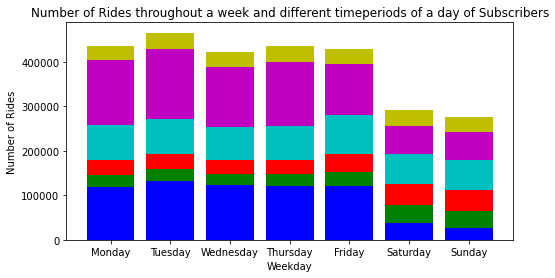

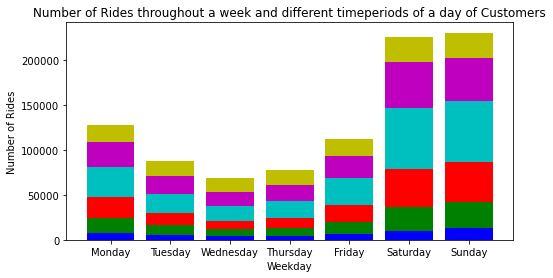

In [46]:
#SUBSCRIBER
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekdays_sub= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides_sub, midmorning_rides_sub, noon_rides_sub, afternoon_rides_sub, evening_rides_sub, night_rides_sub])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays_sub, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day of Subscribers")

#CUSTOMER
# Graph der die Anzahl der Fahrten innerhalb einer Woche und in verschiedenen Zeitperioden darstellt 
fig,ax = plt.subplots(figsize=(8,4))
weekdays_cust= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides_cust, midmorning_rides_cust, noon_rides_cust, afternoon_rides_cust, evening_rides_cust, night_rides_cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays_cust, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week and different timeperiods of a day of Customers")


plt.show()

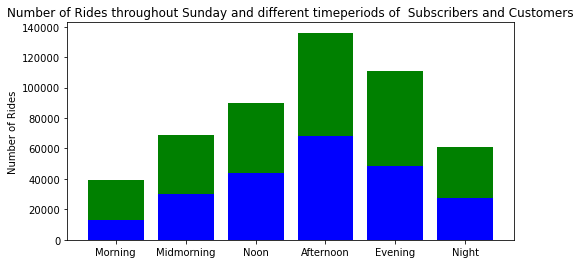

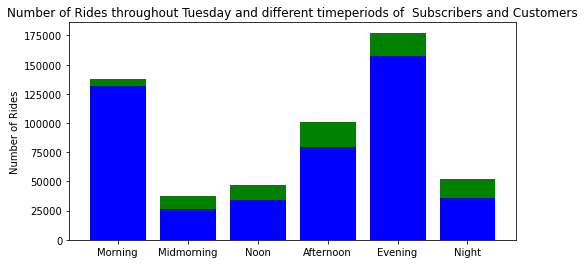

In [53]:
#Sunday
sunday_sub = np.array([morning_sunday_sub['Hour'].size, midmorning_sunday_sub['Hour'].size, noon_sunday_sub['Hour'].size, afternoon_sunday_sub['Hour'].size, evening_sunday_sub['Hour'].size, night_sunday_sub['Hour'].size])
sunday_cust = np.array([morning_sunday_cust['Hour'].size, midmorning_sunday_cust['Hour'].size, noon_sunday_cust['Hour'].size, afternoon_sunday_cust['Hour'].size, evening_sunday_cust['Hour'].size, night_sunday_cust['Hour'].size])



fig,ax = plt.subplots(figsize=(8,4))
day= ['Morning','Midmorning','Noon','Afternoon','Evening','Night']
data = np.array([sunday_cust, sunday_sub])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(day, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout Sunday and different timeperiods of  Subscribers and Customers")


#Tuesday
tuesday_sub = np.array([morning_tuesday_sub['Hour'].size, midmorning_tuesday_sub['Hour'].size, noon_tuesday_sub['Hour'].size, afternoon_tuesday_sub['Hour'].size, evening_tuesday_sub['Hour'].size, night_tuesday_sub['Hour'].size])
tuesday_cust = np.array([morning_tuesday_cust['Hour'].size, midmorning_tuesday_cust['Hour'].size, noon_tuesday_cust['Hour'].size, afternoon_tuesday_cust['Hour'].size, evening_tuesday_cust['Hour'].size, night_tuesday_cust['Hour'].size])


fig,ax = plt.subplots(figsize=(8,4))
day= ['Morning','Midmorning','Noon','Afternoon','Evening','Night']
data = np.array([tuesday_sub, tuesday_cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(day, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout Tuesday and different timeperiods of  Subscribers and Customers")
plt.show()

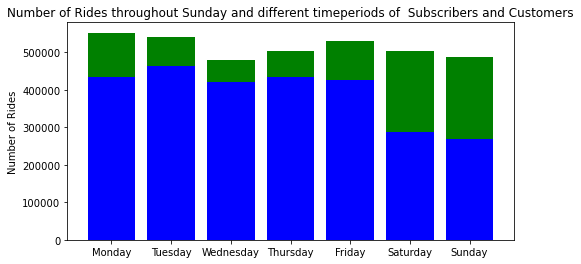

In [59]:
#Sunday
sub_monday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==0)]
sub_tuesday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==1)]
sub_wednesday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==2)]
sub_thursday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==3)]
sub_friday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==4)]
sub_saturday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==5)]
sub_sunday = chicago[(chicago['user_type']=='Subscriber') & (chicago['Weekday']==6)]
cust_monday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==0)]
cust_tuesday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==1)]
cust_wednesday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==2)]
cust_thursday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==3)]
cust_friday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==4)]
cust_saturday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==5)]
cust_sunday = chicago[(chicago['user_type']=='Customer') & (chicago['Weekday']==6)]

sub = np.array([sub_monday['start_time'].size, sub_tuesday['Hour'].size, sub_wednesday['Hour'].size, sub_thursday['Hour'].size, sub_friday['Hour'].size, sub_saturday['Hour'].size, sub_sunday['Hour'].size])
cust = np.array([cust_monday['start_time'].size, cust_tuesday['Hour'].size, cust_wednesday['Hour'].size, cust_thursday['Hour'].size, cust_friday['Hour'].size, cust_saturday['Hour'].size, cust_sunday['Hour'].size])


fig,ax = plt.subplots(figsize=(8,4))
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data = np.array([sub, cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout the weej and different timeperiods of  Subscribers and Customers")

plt.show()